# Project: Writing a Data Scientist Blog Post - Seattle Airbnb Data

## Overview


In this project, I will explore the Seattle Airbnb Data to answer some business questions.

I will use data doaloaded from Kaggle (https://www.kaggle.com/datasets) and follow the CRISP-DM Process while analyzing the data.


## 1. Business Understanding

1. What is the average price per night by Year, Month or Weekday?
2. What are the busiest month of the year?
3. What kind of rooms are there and how many room are there in each?
4. What are the average price of room types?
5. What kind of properties are there and how many propertis are there in each?
6. What are the average prices for the different room and property types?
7. What are the average prices for the different room types and weekday?

## 2. Data Understanding

### Import Libraries 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

### Data Gathering

The dataset used in this project includes the following files:
    
    calendar.csv
    listings.csv
    reviews.csv

In [2]:
df_cal = pd.read_csv('calendar.csv')
df_lis = pd.read_csv('listings.csv')
df_rev = pd.read_csv('reviews.csv')

### Data Assessment

#### Calendar dataset:

In [3]:
df_cal.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [4]:
df_cal.shape

(1393570, 4)

In [5]:
df_cal.nunique()

listing_id    3818
date           365
available        2
price          669
dtype: int64

In [6]:
df_cal.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


For the calendar dataset: It has 4 columns: listing_id, date, available, price.
   
available column contains values t/f meaning true/false

There are some values in column price
price values must be float and date must be datetime.


#### Lists dataset:

In [8]:
df_lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [9]:
df_lis.shape

(3818, 92)

In [10]:
df_lis.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

Lists dataset has 92 columns listing the properties and its information

#### Review dataset:

In [11]:
df_rev.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [12]:
df_rev.shape

(84849, 6)

In [13]:
df_rev.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

Reviews dataset has 84849 rows and 6 columns showing the comments of reviews to the properties

## 3. Prepare Data

### Data Wrangling 

#### Fixing data type and data values

In [14]:
df_cal.sample(3)

,listing_id,date,available,price
1316359,6865696,2016-06-21,t,$100.00
1313559,3041619,2016-10-19,f,NaN
935017,4454121,2016-09-12,f,NaN


In [15]:
# Convert datatype
df_cal['price'] = df_cal['price'].str.replace(',', '')
df_cal['price'] = df_cal['price'].str.replace('$', '')
df_cal['price'] = df_cal['price'].astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_20116\559155783.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cal['price'] = df_cal['price'].str.replace('$', '')


In [16]:
#Convert column date to datetime
df_cal['date'] = pd.to_datetime(df_cal['date'])

In [17]:
# Convert column 'available' to a true/false
df_cal['available'] = df_cal['available'] == 't'

In [18]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  bool          
 3   price       934542 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB


#### Clean data
Since price is analyzed, all missing values in column price will be dropped

In [19]:
df_cal.shape

(1393570, 4)

In [20]:
#Remove missing values in column price
df_cal = df_cal.dropna(subset=["price"])

In [21]:
df_cal.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

#### Get needed columns from listings and reviews datasets

In [22]:
# Get needed columns from lists dataset
df_lis = df_lis[['id','name', 'description','room_type', 'property_type', 'neighbourhood_group_cleansed']]
df_lis.sample(3)

,id,name,description,room_type,property_type,neighbourhood_group_cleansed
3038,6690388,"Cheerful, quiet cottage","Awake to birdsong, enjoy your morning tea or a...",Entire home/apt,House,Lake City
2635,4129218,Stylish Studio Apt w/ Full Kitchen,On residential block just off Broadway w/ many...,Entire home/apt,Apartment,Capitol Hill
2274,9415562,Charming home close to downtown,Lovely craftsman style home in Mt baker neighb...,Private room,House,Rainier Valley


In [23]:
#Rename columns
df_lis = df_lis.rename(columns = {'id': 'listing_id', 'neighbourhood_group_cleansed': 'neighbourhood'})

In [24]:
# Get needed columns from reviews dataset
df_rev = df_rev[['listing_id','comments']]
df_rev.sample(3)

,listing_id,comments
80690,6780670,"Talitha's place, more lovely than her photos d..."
9014,6671901,Comfortable and clean apartment. Great locatio...
78193,3861673,"Alles super. Wenn alle so wären wie Debbie, wü..."


In [25]:
df_cal.head(1)

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0


#### Merge datasets

In [26]:
df_merge = pd.merge(df_lis, df_cal, on=['listing_id', 'listing_id'])

In [27]:
df_merge.head(3)

,listing_id,name,description,room_type,property_type,neighbourhood,date,available,price
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Entire home/apt,Apartment,Queen Anne,2016-01-04,True,85.0
1,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Entire home/apt,Apartment,Queen Anne,2016-01-05,True,85.0
2,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Entire home/apt,Apartment,Queen Anne,2016-01-13,True,85.0


In [28]:
df_merge.shape

(934542, 9)

####  Handle categorical datatype

In [29]:
# Convert column neighbourhood to categorical variable 
df_merge['neighbourhood'] = df_merge['neighbourhood'].astype('category')
# Shorten 'other neighbourhoods' to 'other' for length in visualizations
df_merge['neighbourhood'] = df_merge['neighbourhood'].replace('Other neighborhoods','Other')

In [30]:
df_merge.describe()

,listing_id,price
count,9.345420e+05,934542.000000
mean,5.305517e+06,137.944859
std,2.974821e+06,105.062870
min,3.335000e+03,10.000000
25%,2.875975e+06,75.000000
50%,5.615620e+06,109.000000
75%,7.873345e+06,160.000000
max,1.034016e+07,1650.000000


#### Answer the quetions

#### 1. What is the average price per night?

In [32]:
# Define a function to get data according to day, month or year
def getPrice(time): 
    
    """ Get the aveage price based on time.
      Args:
          time (string):  if time = '%m' then the function will get price by month
                          if time = '%Y' then the function will get price by year
                          if time = '%w' then the function will get price by weekday

      Returns:
          float: The aveage price.
      """
    avg_price = df_merge.groupby(df_merge['date'].dt.strftime(time))['price'].mean()
    avg_price = pd.DataFrame(avg_price).reset_index()
    avg_price['price'] = round(avg_price['price'],2)
    return avg_price

#### a. Monthly average price

In [33]:
# Monthly average price per night
avg_price_month = getPrice('%m') #use user_defined function 
avg_price_month.rename(columns = {'date': 'Month'}, inplace = True)
avg_price_month

,Month,price
0,01,122.91
1,02,124.29
2,03,128.64
3,04,135.10
4,05,139.54
5,06,147.47
6,07,152.09
7,08,150.66
8,09,143.26
9,10,137.03


#### b. Yearly average price

In [34]:
# Yearly average price per year
avg_price_year = getPrice('%Y')
avg_price_year.rename(columns = {'date': 'Year'}, inplace = True)
avg_price_year

,Year,price
0,2016,137.95
1,2017,136.88


#### c. Weekday average price

In [35]:
# Weekday average price per year
avg_price_day = getPrice('%w')
avg_price_day['date'] = avg_price_day['date'].replace(['0','1','2','3','4','5','6'], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
avg_price_day.rename(columns = {'date': 'Day'}, inplace = True)
avg_price_day

,Day,price
0,Mon,136.46
1,Tue,135.68
2,Wed,135.41
3,Thu,135.45
4,Fri,136.48
5,Sat,143.04
6,Sun,143.20


In [36]:
df_merge.head(1)

,listing_id,name,description,room_type,property_type,neighbourhood,date,available,price
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Entire home/apt,Apartment,Queen Anne,2016-01-04,True,85.0


#### 2. What are the busiest month of the year?

In [37]:
df_visit = df_merge.groupby(df_merge['date'].dt.strftime('%Y-%m'))['listing_id'].count()
df_visit = pd.DataFrame(df_visit).reset_index()
df_visit = df_visit.rename(columns = {'date':'Month', 'listing_id':'Count'})
df_visit

,Month,Count
0,2016-01,59239
1,2016-02,73321
2,2016-03,83938
3,2016-04,76037
4,2016-05,79971
5,2016-06,77244
6,2016-07,74222
7,2016-08,76347
8,2016-09,77246
9,2016-10,82438


#### 3. What kind of rooms are there and how many room are there in each?

In [38]:
df_room_type = df_lis.groupby('room_type')['listing_id'].count()
df_room_type = pd.DataFrame(df_room_type).reset_index()
df_room_type = df_room_type.rename(columns = {'listing_id': 'Count'})
df_room_type

,room_type,Count
0,Entire home/apt,2541
1,Private room,1160
2,Shared room,117


#### 4. What are the average price of room types?

In [39]:
df_room_type_price = df_merge.groupby('room_type')['price'].mean()
df_room_type_price = pd.DataFrame(df_room_type_price).reset_index()
df_room_type_price = df_room_type_price.rename(columns = {'price': 'avg_price'})
df_room_type_price.avg_price = round(df_room_type_price.avg_price, 2)
df_room_type_price

,room_type,avg_price
0,Entire home/apt,173.47
1,Private room,79.35
2,Shared room,48.43


#### 5. What kind of properties are there and how many propertis are there in each?

In [40]:
# Number of listings of each property type
df_property = df_merge["property_type"].value_counts()
df_property

House              436641
Apartment          407603
Townhouse           27155
Condominium         19226
Loft                 9891
Bed & Breakfast      9862
Other                6952
Cabin                5082
Camper/RV            3423
Bungalow             3307
Boat                 2275
Tent                  874
Treehouse             673
Chalet                666
Dorm                  426
Yurt                  177
Name: property_type, dtype: int64

#### 6. What are the average prices for the different room and property types?

In [41]:
room_property_price = df_merge.groupby(['property_type','room_type']).price.mean()
room_property_price = room_property_price.reset_index()
room_property_price = room_property_price.rename(columns = {'price': 'avg_price'})
room_property_price.avg_price = round(room_property_price.avg_price, 2)
room_property_price=room_property_price.sort_values('avg_price',ascending=False)
room_property_price.head()

,property_type,room_type,avg_price
6,Boat,Entire home/apt,526.88
32,Townhouse,Entire home/apt,219.94
21,House,Entire home/apt,207.01
35,Treehouse,Entire home/apt,200.00
17,Condominium,Entire home/apt,199.53


#### 7. What are the average prices for the different room types and weekday?

In [42]:
avg_price_room_day = df_merge.groupby([df_merge['date'].dt.strftime('%w'), 'room_type'])['price'].mean()
avg_price_room_day = avg_price_room_day.reset_index()
avg_price_room_day.price = round(avg_price_room_day.price, 2)
avg_price_room_day['date'] = avg_price_room_day['date'].replace(['0','1','2','3','4','5','6'], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
avg_price_room_day.rename(columns = {'date': 'Day', 'price':'avg_price'}, inplace = True)

avg_price_room_day

,Day,room_type,avg_price
0,Mon,Entire home/apt,171.54
1,Mon,Private room,78.42
2,Mon,Shared room,47.96
3,Tue,Entire home/apt,170.47
4,Tue,Private room,78.20
5,Tue,Shared room,47.90
6,Wed,Entire home/apt,170.14
7,Wed,Private room,78.13
8,Wed,Shared room,47.88
9,Thu,Entire home/apt,170.23


## 4. Result Evaluation

#### Data Visualizations

#### 1. What is the average price per night?

In [43]:
def set_plot_info(title, xaxis, yaxis):
    plt.title = title
    plt.xlabel = xaxis
    plt.ylabel = yaxis

#### a. Monthly average price

<BarContainer object of 12 artists>

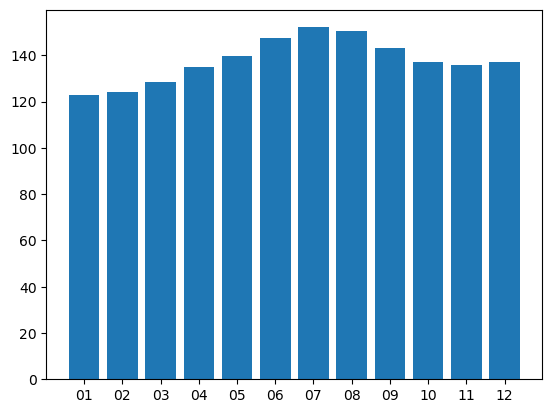

In [44]:
plt.bar(avg_price_month.Month , avg_price_month.price)


From the bar plot, we can see that, the price in moths 7 and 8 are the highest, and then, months 6 and 9. This mean, peope tend to travel alot in summer.

#### Weekday average price

<Axes: xlabel='Day', ylabel='price'>

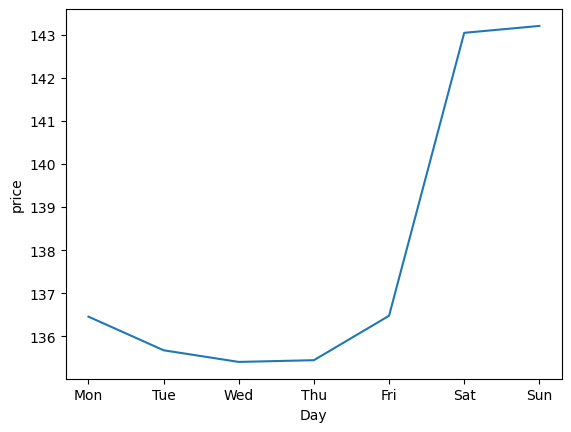

In [45]:
sn.lineplot(data=avg_price_day, x="Day", y="price")


It can be seen that, the price increase sharply at weekend.

#### 2. What are the busiest month of the year?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2016-01'),
  Text(1, 0, '2016-02'),
  Text(2, 0, '2016-03'),
  Text(3, 0, '2016-04'),
  Text(4, 0, '2016-05'),
  Text(5, 0, '2016-06'),
  Text(6, 0, '2016-07'),
  Text(7, 0, '2016-08'),
  Text(8, 0, '2016-09'),
  Text(9, 0, '2016-10'),
  Text(10, 0, '2016-11'),
  Text(11, 0, '2016-12'),
  Text(12, 0, '2017-01')])

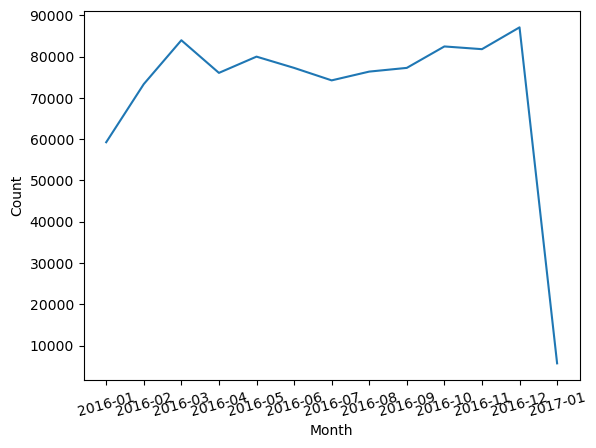

In [46]:
sn.lineplot(data=df_visit , x="Month", y="Count")
plt.xticks(rotation = 15)

#### 3. What kind of properties are there and how many propertis are there in each?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Apartment'),
  Text(1, 0, 'House'),
  Text(2, 0, 'Cabin'),
  Text(3, 0, 'Condominium'),
  Text(4, 0, 'Camper/RV'),
  Text(5, 0, 'Bungalow'),
  Text(6, 0, 'Townhouse'),
  Text(7, 0, 'Loft'),
  Text(8, 0, 'Boat'),
  Text(9, 0, 'Bed & Breakfast'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Dorm'),
  Text(12, 0, 'Treehouse'),
  Text(13, 0, 'Yurt'),
  Text(14, 0, 'Chalet'),
  Text(15, 0, 'Tent')])

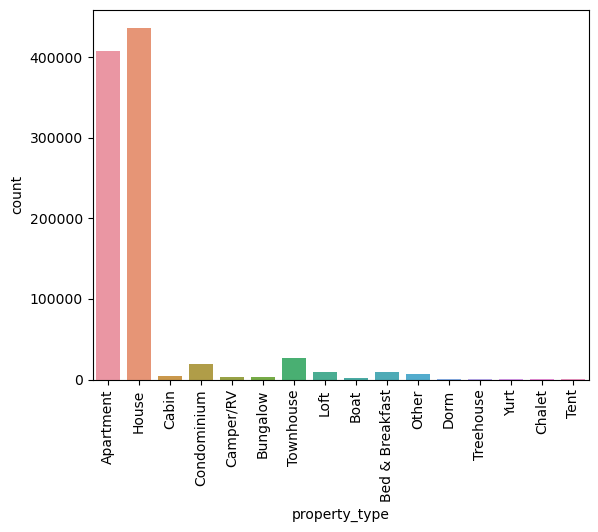

In [47]:
sn.countplot(data=df_merge, x = 'property_type')
plt.xticks(rotation = 90)

There are many types of properties. Among these, Apartment and House are the most popular.

#### 4. What are the average prices for the different room and property types?

<Axes: xlabel='room_type', ylabel='property_type'>

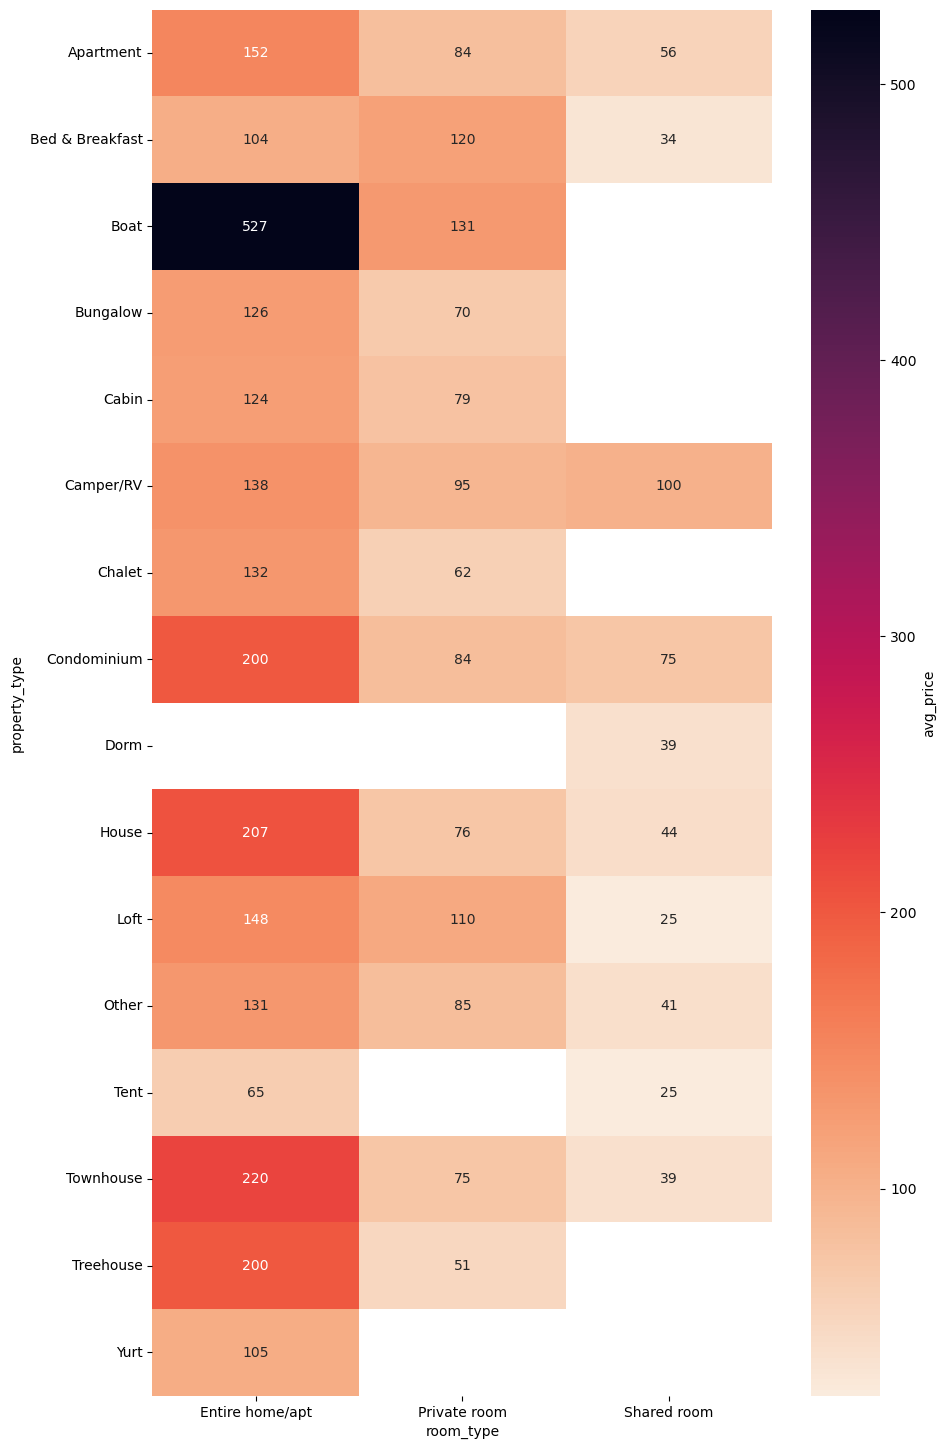

In [48]:
plt.figure(figsize = (10,18))
sn.heatmap(room_property_price.groupby(['property_type', 'room_type']).avg_price.mean().unstack(), annot=True, fmt=".0f", 
           cmap = sn.cm.rocket_r,cbar_kws={'label': 'avg_price'})

The heatmap plot shows the prices of room types and property types. We can see that room type 'Entire home/apt' of Boat is the most expensive, reach at 527usd per night. Room type Share room of two properties types Loft and Tent have the lowwest price, at 25usd per night.

#### 5. What are the average prices for the different room types and weekday?

In [49]:
avg_price_room_day

,Day,room_type,avg_price
0,Mon,Entire home/apt,171.54
1,Mon,Private room,78.42
2,Mon,Shared room,47.96
3,Tue,Entire home/apt,170.47
4,Tue,Private room,78.20
5,Tue,Shared room,47.90
6,Wed,Entire home/apt,170.14
7,Wed,Private room,78.13
8,Wed,Shared room,47.88
9,Thu,Entire home/apt,170.23


<Axes: xlabel='Day', ylabel='avg_price'>

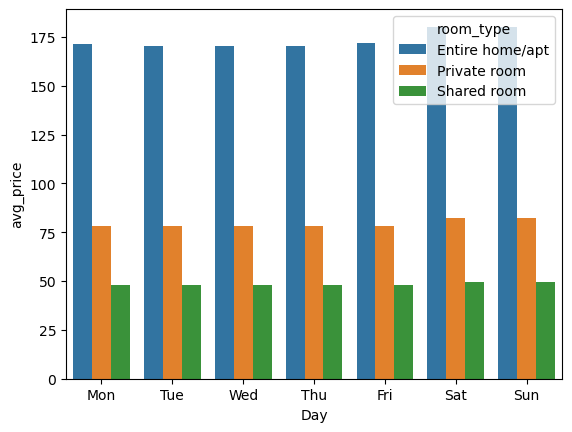

In [50]:
sn.barplot(avg_price_room_day, x="Day", y="avg_price", hue="room_type")

We can see that, the price of Entire/home at the weekend increase. This means, People like travelling at the weekend with their faimily.